# 泰坦尼克号生存预测数据探索性分析

## 一：读取数据

In [57]:
# 导入环境库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 正常显示中文
plt.rcParams['font.sans-serif']=['SimHei']
# 正常显示符号
plt.rcParams['axes.unicode_minus']=False
from pprint import pprint

In [2]:
data_train=pd.read_csv('data/train.csv')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 二：对数据做描述性统计分析

In [3]:
# 完整性分析
data_train.info()
# 数值型数据描述分析
data_train.describe()
# 类别型数据描述分析
# data_train.select_dtypes('object').describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


完整性分析：819位乘客，年龄（714），客舱号（204），登船港口（889）有缺失值

数值型数据描述分析：平均乘客年龄29.7岁，38.3%的人获救了

类别型数据描述分析：男生偏多，登船港口S偏多

In [4]:
arr=np.array([1,2,3,4])
arr[arr>1]

array([2, 3, 4])

In [5]:
arr>1

array([False,  True,  True,  True])

### 1、获救情况人数可视化

In [6]:
data_Survived=data_train.Survived.value_counts()
data_Survived

0    549
1    342
Name: Survived, dtype: int64

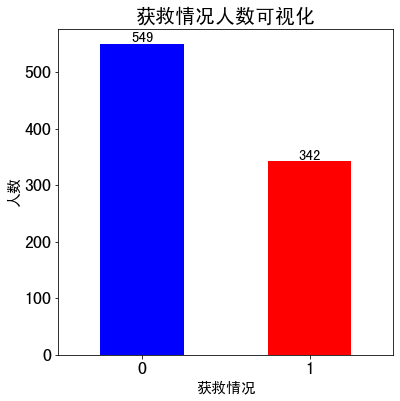

In [7]:
data_train.Survived.value_counts().plot(kind='bar',
                                        rot=0,
                                        figsize=(6,6),
                                        fontsize=18,
                                        color=['b','r'])
plt.title('获救情况人数可视化',fontsize=20)
plt.xlabel('获救情况',fontsize=15)
plt.ylabel('人数',fontsize=15)
for a,b in zip(data_Survived.index,data_Survived.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

### 2、各登船口岸人数可视化

In [8]:
data_Embarked=data_train.Embarked.value_counts()
data_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

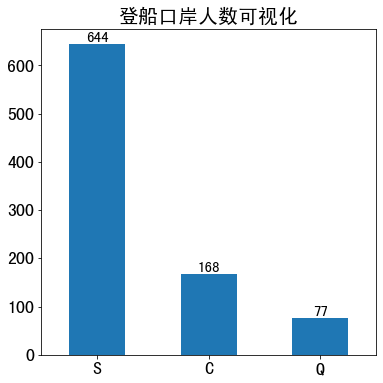

In [9]:
data_train.Embarked.value_counts().plot(kind='bar',
                                        rot=0,
                                        figsize=(6,6),
                                        fontsize=18)
plt.title('登船口岸人数可视化',fontsize=20)
plt.xticks([0,1,2])
for a,b in zip([0,1,2],data_Embarked.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

### 3、乘客等级人数可视化

In [10]:
data_Pclass=data_train.Pclass.value_counts()
data_Pclass

3    491
1    216
2    184
Name: Pclass, dtype: int64

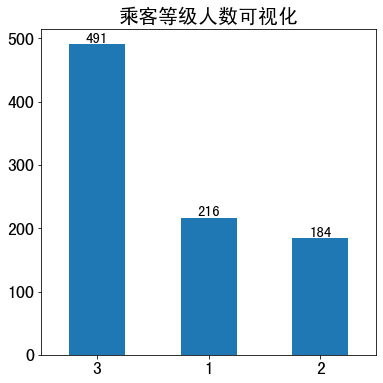

In [11]:
data_train.Pclass.value_counts().plot(kind='bar',
                                        rot=0,
                                        figsize=(6,6),
                                        fontsize=18)
plt.title('乘客等级人数可视化',fontsize=20)
plt.xticks([0,1,2])
for a,b in zip([0,1,2],data_Pclass.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

### 4、性别分布

In [12]:
data_Sex=data_train.Sex.value_counts()
data_Sex

male      577
female    314
Name: Sex, dtype: int64

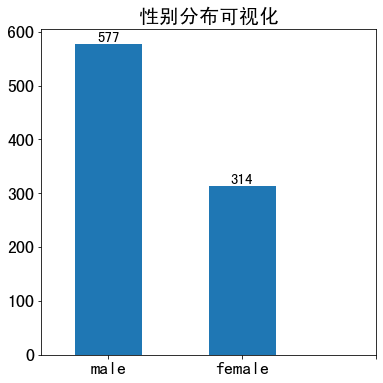

In [13]:
data_train.Sex.value_counts().plot(kind='bar',
                                        rot=0,
                                        figsize=(6,6),
                                        fontsize=18)
plt.title('性别分布可视化',fontsize=20)
plt.xticks([0,1,2])
for a,b in zip([0,1,2],data_Sex.values):
    plt.text(a,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

获救人数300多点，不到半数，
S港口的乘客比较多，三等舱乘客比较多，男生比较多

In [14]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## 三：探索性数据分析

### 1、分析各等级乘客年龄分布情况

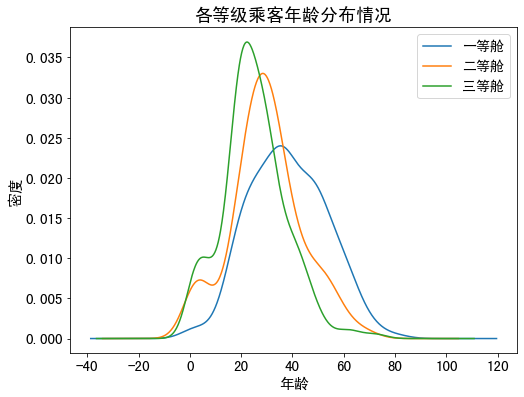

In [15]:
plt.figure(figsize=(8,6))
data_train.Age[data_train.Pclass==1].plot(kind='kde',fontsize=15)
data_train.Age[data_train.Pclass==2].plot(kind='kde',fontsize=15)
data_train.Age[data_train.Pclass==3].plot(kind='kde',fontsize=15)
plt.xlabel('年龄',fontsize=15)
plt.ylabel('密度',fontsize=15)
plt.title('各等级乘客年龄分布情况',fontsize=18)
plt.legend(['一等舱','二等舱','三等舱'],fontsize=14)

### 2、分析特征和结果之间的关系

#### (1)、查看各乘客等级的获救情况

In [16]:
data_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [17]:
# 未获救情况统计
survived_0=data_train.Pclass[data_train.
                             Survived==0].value_counts()
# 获救情况统计
survived_1=data_train.Pclass[data_train.
                             Survived==1].value_counts()
# survived_1
df_pclass=pd.DataFrame({'获救':survived_1,
                        '未获救':survived_0})
df_pclass

,获救,未获救
1,136,80
2,87,97
3,119,372


In [18]:
df_pclass.index

Int64Index([1, 2, 3], dtype='int64')

In [19]:
df_pclass['获救'].values

array([136,  87, 119])

In [20]:
df_pclass.values

array([[136,  80],
       [ 87,  97],
       [119, 372]])

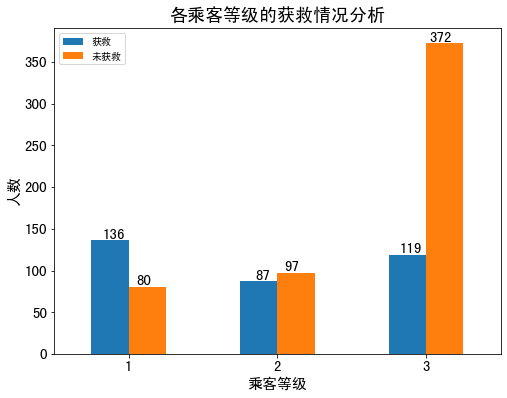

In [21]:
df_pclass.plot(kind='bar',fontsize=15,rot=0,figsize=(8,6))
plt.xlabel('乘客等级',fontsize=15)
plt.ylabel('人数',fontsize=15)
plt.title('各乘客等级的获救情况分析',fontsize=18)
plt.xticks([0,1,2])
for a,b in zip([0,1,2],df_pclass['获救'].values):
    plt.text(a-0.1,b,'%.f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1,2],df_pclass['未获救'].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

In [22]:
rate_pclass=df_pclass['获救']/(df_pclass['获救']+df_pclass['未获救'])
rate_pclass=np.round(rate_pclass,2)
df_pclass['rate_pclass']=rate_pclass
df_pclass

,获救,未获救,rate_pclass
1,136,80,0.63
2,87,97,0.47
3,119,372,0.24


#### (2)、查看各性别的获救情况

In [23]:
survived_0=data_train.Sex[data_train.
                          Survived==0].value_counts()
survived_0
survived_1=data_train.Sex[data_train.
                          Survived==1].value_counts()
survived_1
df_Sex=pd.DataFrame({'获救':survived_1,'未获救':survived_0})
df_Sex

,获救,未获救
female,233,81
male,109,468


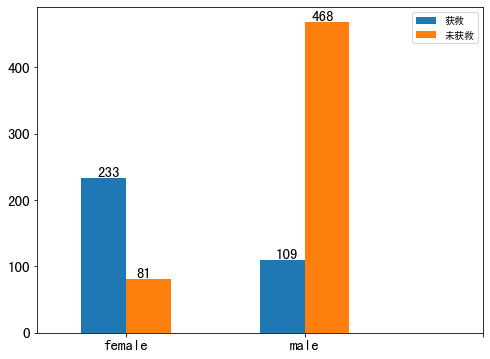

In [24]:
df_Sex.plot(kind='bar',rot=0,fontsize=15,figsize=(8,6))
plt.xticks([0,1,2])
for a,b in zip([0,1],df_Sex['获救'].values):
    plt.text(a-0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1],df_Sex['未获救'].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

In [25]:
rate_sex=df_Sex['获救']/(df_Sex['获救']+df_Sex['未获救'])
rate_sex=np.round(rate_sex,2)
df_Sex['rate_sex']=rate_sex
df_Sex

,获救,未获救,rate_sex
female,233,81,0.74
male,109,468,0.19


#### (3)、查看各登船港口的获救情况

In [26]:
survived_0=data_train.Embarked[data_train.
                          Survived==0].value_counts()
survived_0
survived_1=data_train.Embarked[data_train.
                          Survived==1].value_counts()
survived_1
df_Embarked=pd.DataFrame({'获救':survived_1,'未获救':survived_0})
df_Embarked

,获救,未获救
S,217,427
C,93,75
Q,30,47


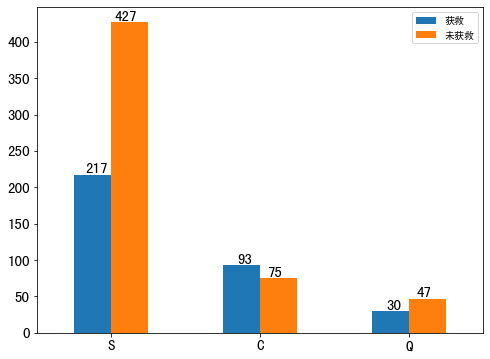

In [27]:
df_Embarked.plot(kind='bar',rot=0,fontsize=15,figsize=(8,6))
plt.xticks([0,1,2])
for a,b in zip([0,1,2],df_Embarked['获救'].values):
    plt.text(a-0.1,b,'%.f'%b,ha='center',va='bottom',fontsize=15)
for a,b in zip([0,1,2],df_Embarked['未获救'].values):
    plt.text(a+0.1,b,'%.0f'%b,ha='center',va='bottom',fontsize=15)

In [28]:
rate_Embarked=df_Embarked['获救']/(df_Embarked['获救']+df_Embarked['未获救'])
rate_Embarked=np.round(rate_Embarked,2)
df_Embarked['rate_Embarked']=rate_Embarked
df_Embarked

,获救,未获救,rate_Embarked
S,217,427,0.34
C,93,75,0.55
Q,30,47,0.39


#### (4)、堂兄弟和父母字段对于获救情况分析

Text(0.5, 0, 'no_parch')

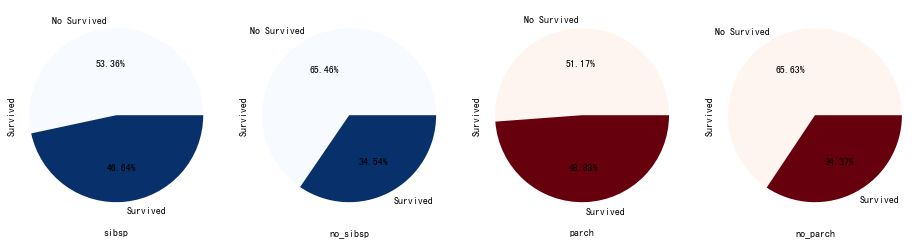

In [29]:
# （1）有无兄弟姐妹/父母子女和存活与否的关系
# 根据题目要求，分四种情况（有无兄弟，有无父母）计算存活率。
# 先进行数据筛选。
sib_data = data_train[data_train['SibSp'] != 0]
# sib_data
nosib_data = data_train[data_train['SibSp'] == 0]
par_data = data_train[data_train['Parch'] != 0]
nopar_data = data_train[data_train['Parch'] == 0]
sib_data['Survived'].value_counts()
fig=plt.figure(figsize = (16,4))
# #有无兄弟姐妹的存活率对比
ax1=fig.add_subplot(141)
plt.axis('equal')
sib_data['Survived'].value_counts().plot(kind='pie',labels = ['No Survived','Survived'],autopct = '%.2f%%',colormap = 'Blues')
plt.xlabel('sibsp')

ax2=fig.add_subplot(142)
plt.axis('equal')
nosib_data['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%.2f%%',colormap = 'Blues')
plt.xlabel('no_sibsp')

#有无父母子女的存活率对比
ax3=fig.add_subplot(143)
plt.axis('equal')
par_data['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%.2f%%',colormap = 'Reds')
plt.xlabel('parch')

ax4=fig.add_subplot(144)
plt.axis('equal')
nopar_data['Survived'].value_counts().plot.pie(labels = ['No Survived','Survived'],autopct = '%.2f%%',colormap = 'Reds')
plt.xlabel('no_parch')

#### 5、cabin有没有值对于获救情况的影响

In [30]:
pd.notnull(data_train.Cabin)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [31]:
# 有cabin记录的数据
survived_cabin=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
# 没有cabin记录的数据
survived_nocabin=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
survived_nocabin

0    481
1    206
Name: Survived, dtype: int64

In [32]:
df_cabin=pd.DataFrame({'有':survived_cabin,'无':survived_nocabin}).T
df_cabin

,0,1
有,68,136
无,481,206


In [33]:
# df_cabin.plot(kind='bar',rot=0,figsize=(8,6),fontsize=15)

In [34]:
rate_cabin=df_cabin[1]/(df_cabin[0]+df_cabin[1])
rate_cabin=np.round(rate_cabin,2)

df_cabin['rate_cabin']=rate_cabin
df_cabin

,0,1,rate_cabin
有,68,136,0.67
无,481,206,0.30


In [35]:
fare_die = data_train['Fare'][data_train['Survived'] == 0]
fare_sur = data_train['Fare'][data_train['Survived'] == 1]
fare_die.describe()

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

In [36]:
fare_sur.describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

### 3、数据预处理

In [37]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
# 缺失值处理 Age
data_train['Age']=data_train['Age'].fillna(data_train['Age'].mean())

In [39]:
# 缺失值处理 Embarked
data_train['Embarked']=data_train['Embarked'].fillna('S')

In [40]:
# 缺失值处理 Cabin
def set_cabin_type(df):
    df.loc[(df.Cabin.notnull()),'Cabin']='Yes'
    df.loc[(df.Cabin.isnull()),'Cabin']='No'
    return df

In [41]:
data_train1=set_cabin_type(data_train)

In [42]:
data_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [43]:
data_train1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


In [44]:
# 数据类型转换 类别型数据转换为数值型
dummies_Cabin=pd.get_dummies(data_train1['Cabin'],prefix='Cabin')
dummies_Sex=pd.get_dummies(data_train1['Sex'],prefix='Sex')
dummies_Embarked=pd.get_dummies(data_train1['Embarked'],prefix='Embarked')
dummies_Pclass=pd.get_dummies(data_train1['Pclass'],prefix='Pclass')
df=pd.concat([data_train1,dummies_Cabin,
              dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,0,1,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,1,0,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,0,1,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,1,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,0,1,0,0,1,0,1


In [45]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_No', 'Cabin_Yes',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [46]:
df.drop(['Pclass','Name','Ticket','Cabin','Embarked','Sex']
        ,axis=1,inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1


In [48]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.725028,0.242424,0.206510,0.551066,0.352413,0.647587
std,257.353842,0.486592,13.002015,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.446751,0.428790,0.405028,0.497665,0.477990,0.477990
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,668.500000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
# 数据标准化处理 Age,Fare
a=df.Age
df['Age_scaled']=(a-a.mean())/(a.std())
b=df.Fare
df['Fare_scaled']=(b-b.mean())/(b.std())
df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1,-0.592148,-0.502163
1,2,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0,1,0,0.638430,0.786404
2,3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.284503,-0.488580
3,4,1,35.0,1,0,53.1000,0,1,0,0,1,1,0,0,1,0,0.407697,0.420494
4,5,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1,0.407697,-0.486064


In [50]:
df.drop('Age',axis=1,inplace=True)

In [51]:
df.head()

,PassengerId,Survived,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,1,0,1,0,7.2500,1,0,0,0,1,0,0,1,0,1,-0.592148,-0.502163
1,2,1,1,0,71.2833,0,1,1,0,0,1,0,0,1,0,0.638430,0.786404
2,3,1,0,0,7.9250,1,0,0,0,1,0,0,1,1,0,-0.284503,-0.488580
3,4,1,1,0,53.1000,0,1,0,0,1,1,0,0,1,0,0.407697,0.420494
4,5,0,0,0,8.0500,1,0,0,0,1,0,0,1,0,1,0.407697,-0.486064


### 4、数据分析建模

In [58]:
# 我们把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression逻辑回归建模
from sklearn import linear_model

train_df = df.filter(regex='Survived|ArithmeticErrorge_.*|SibSp|Parch|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*|Fare_.*')
pprint(train_df)
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]
# y
# X即特征属性值
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression()
clf.fit(X, y)  
# clf
# y
# X
print("模型正确率："+str(clf.score(X,y)))

     Survived  SibSp  Parch  Cabin_No  Cabin_Yes  Embarked_C  Embarked_Q  \
0           0      1      0         1          0           0           0   
1           1      1      0         0          1           1           0   
2           1      0      0         1          0           0           0   
3           1      1      0         0          1           0           0   
4           0      0      0         1          0           0           0   
..        ...    ...    ...       ...        ...         ...         ...   
886         0      0      0         1          0           0           0   
887         1      0      0         0          1           0           0   
888         0      1      2         1          0           0           0   
889         1      0      0         0          1           1           0   
890         0      0      0         1          0           0           1   

     Embarked_S  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0             1 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
# 读取测试集数据
data_test = pd.read_csv("data/test.csv")
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [54]:
# 接着我们对test_data做和train_data中一致的特征变换
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0

#补充Age的缺失值
data_test['Age']=data_test['Age'].fillna(data_test['Age'].mean())

#按Cabin有无数据，将这个属性处理成Yes和No两种类型
def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df
data_train = set_Cabin_type(data_test)

# one-hot编码
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')

df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# 标准化处理数据
a=df_test.Age
df_test['Age_scaled'] = (a - a.mean()) / (a.std())
df_test=df_test.drop('Age',axis=1)

b=df_test.Fare
df_test['Fare_scaled'] = (b - b.mean()) / (b.std())
df_test=df_test.drop('Fare',axis=1)
df_test.head(6)

,PassengerId,SibSp,Parch,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
0,892,0,0,1,0,0,1,0,0,1,0,0,1,0.334592,-0.496043
1,893,1,0,1,0,0,0,1,1,0,0,0,1,1.323944,-0.510885
2,894,0,0,1,0,0,1,0,0,1,0,1,0,2.511166,-0.462780
3,895,0,0,1,0,0,0,1,0,1,0,0,1,-0.259019,-0.481127
4,896,1,1,1,0,0,0,1,1,0,0,0,1,-0.654760,-0.416242
5,897,0,0,1,0,0,0,1,0,1,0,0,1,-1.287945,-0.471059


In [55]:
# from sklearn.metrics import accuracy_score 
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
# test
predictions = clf.predict(test.values)  # 只需要放属性，不需要放标签。

result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_predictions.csv", index=False)

In [56]:
pd.read_csv("logistic_regression_predictions.csv").head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0
